In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def rmse(y, y_hat):
    return np.sqrt(mean_squared_error(y, y_hat))


class CompanyNameExtracter(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X = X.copy()
        # X -> DataFrame -> X["name"] which needs to be transformed
        X.loc[:, "name"] = X["name"].apply(self.process_string)
        return X
    @staticmethod
    def process_string(value):
        map_d = {'maxda': 'mazda',
        "toyouta":  "toyota",
        "vokswagen":  "vw",
        "volkswagen": "vw",}
        result = value.lower().strip().split(" ")
        name = result[0]
        if name in map_d.keys():
            name = map_d[name]
        return name

def get_data(dataset_name):
    return sns.load_dataset(dataset_name)

mpg = get_data("mpg")
mpg.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [3]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
print('Sum of duplicated values: {}\n'.format(mpg.duplicated().sum()))
print('Sum of null values: {}'.format(mpg.isnull().sum()))

sum of duplicated values: 0

sum of null values: mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


In [7]:
display(mpg.describe())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


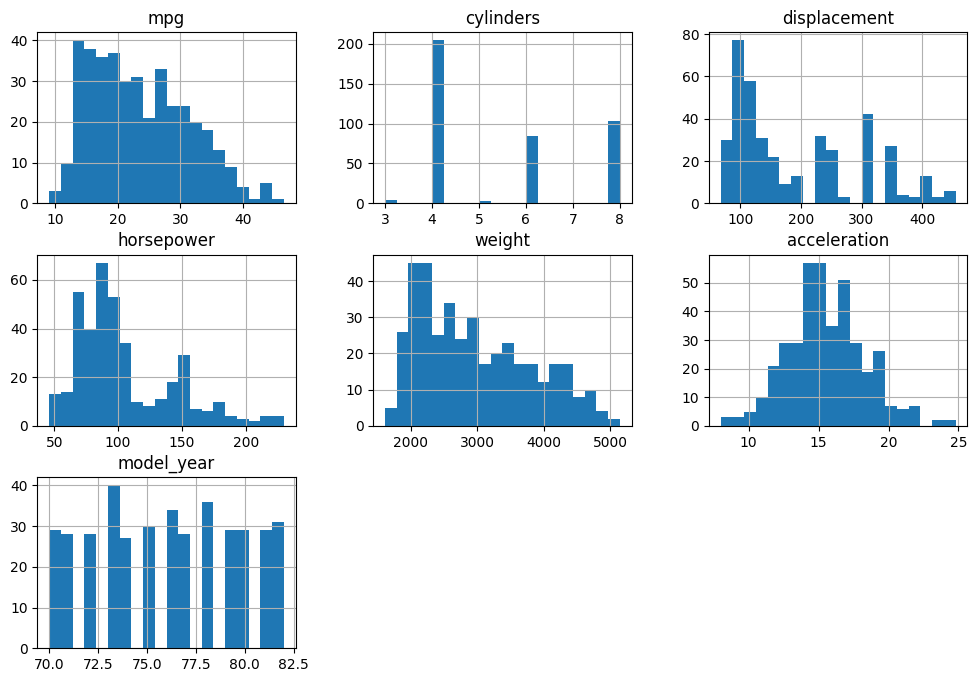

In [8]:
mpg.hist(figsize=(12,8),bins=20)
plt.show()

<ipython-input-9-52d0676b1671>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mpg.corr(),cmap=plt.cm.Reds,annot=True)


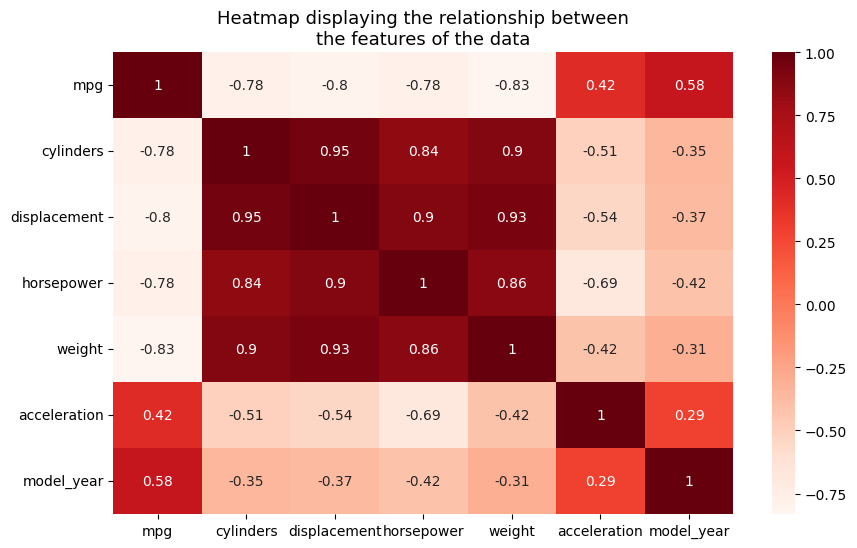

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(mpg.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between\nthe features of the data',
         fontsize=13)
plt.show()

In [ ]:
X = mpg.drop("mpg", axis=1) #features
y = mpg["mpg"] #target
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [ ]:
#Sampling
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.05,
                                                   random_state=145)
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
372,4,151.0,90.0,2735,18.0,82,usa,pontiac phoenix
68,8,350.0,155.0,4502,13.5,72,usa,buick lesabre custom
32,4,98.0,NaN,2046,19.0,71,usa,ford pinto
195,4,85.0,52.0,2035,22.2,76,usa,chevrolet chevette
216,4,98.0,68.0,2045,18.5,77,japan,honda accord cvcc


In [ ]:
y_train.head()

372    27.0
68     13.0
32     25.0
195    29.0
216    31.5
Name: mpg, dtype: float64

In [ ]:
num_features = ["displacement", "horsepower", "weight", "acceleration"]
ord_features = ["name"]
nominal_features = ["origin"]
pass_through_cols = ["cylinders"]
drop_cols = ["model_year"]

numerical_pipeline = Pipeline([ ("imputer", SimpleImputer()), ("std scaler", StandardScaler())])
ordinal_pipeline = Pipeline([ ("extract company name", CompanyNameExtracter()),
                         ("ordinal encoder", OrdinalEncoder()),
                         ("std scaling", StandardScaler())
                        ])
nominal_pipeline = Pipeline([ ("one hot encoding", OneHotEncoder() ) ])

pipeline = ColumnTransformer([
    ("numerical pipeline", numerical_pipeline, num_features), #["displacement", "horsepower", "weight", "acceleration"]
    ("ordinal pipeline", ordinal_pipeline, ord_features), #  ["name"]
    ("nominal pipeline", nominal_pipeline, nominal_features), # ["europe", "japan", "usa"]
    ("passing columns", "passthrough", pass_through_cols), # ["cylinders"]
    ("drop columns", "drop", drop_cols)# model_year

])

output_cols = ["displacement", "horsepower", "weight", "acceleration",
               "name", "europe", "japan", "usa", "cylinders"]

X_train_tr = pipeline.fit_transform(X_train)
X_train_tr = pd.DataFrame(X_train_tr, columns=output_cols)

X_test_tr = pipeline.transform(X_test)
X_test_tr = pd.DataFrame(X_test_tr, columns=output_cols)

In [ ]:
model = LinearRegression()
model.fit(X_train_tr, y_train)
print(model.intercept_, model.coef_)

27.484008268080387 [ 1.44872475 -2.13916249 -4.41988656  0.10485884  0.3768301  -0.26666083
  1.31518724 -1.04852641 -0.63055427]


In [ ]:
def generate_models_report(models, X_train_tr, y_train, X_test_tr, y_test):
    width = 116
    print("_"*width)
    title = "|{:^30}|{:^20}|{:^20}|{:^20}|{:^20}|"
    print(title.format("Model Name", "Train Error", "Test Error", "Train Accuracy", "Test Accuracy"))
    print("_"*width)
    row = "|{:^30}|{:^20.2f}|{:^20.2f}|{:^20.2f}|{:^20.2f}|"
    for model in models:
        model.fit(X_train_tr, y_train)
        y_hat_train = model.predict(X_train_tr)
        y_hat_test = model.predict(X_test_tr)
        train_error = rmse(y_train, y_hat_train)
        test_error = rmse(y_test, y_hat_test)
        train_accuracy = r2_score(y_train, y_hat_train)
        test_accuracy = r2_score(y_test, y_hat_test)
        model_name = str(model)
        print(row.format(model_name, train_error, test_error, train_accuracy*100, test_accuracy*100))
        print("-"*width)



from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = [LinearRegression(), SGDRegressor(), SVR(), DecisionTreeRegressor(), RandomForestRegressor()]

generate_models_report(models, X_train_tr, y_train, X_test_tr, y_test)


____________________________________________________________________________________________________________________
|          Model Name          |    Train Error     |     Test Error     |   Train Accuracy   |   Test Accuracy    |
____________________________________________________________________________________________________________________
|      LinearRegression()      |        4.17        |        3.45        |       71.90        |       66.07        |
--------------------------------------------------------------------------------------------------------------------
|        SGDRegressor()        |        4.61        |        3.30        |       65.77        |       69.01        |
--------------------------------------------------------------------------------------------------------------------
|            SVR()             |        4.18        |        3.53        |       71.79        |       64.51        |
----------------------------------------------------------------